<a href="https://colab.research.google.com/github/samugatu/AnaliseDeDesempenhoAcademico/blob/main/Classificacao_renda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Renda

Carregar os dados do dataset com a biblioteca pandas:

In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')

Vamos fazer um pequeno tratamento nos dados. Primeiramente subsitituindo os espaços com "?" por "NaN", e posteriormente remover as linhas com missing values.

In [ ]:
import numpy as np

df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

Vamos agora separar as colunas categorias e aplicar Label Encoding, basicamente, transformar algo categporico em numerico para que o modelo possa "pensar" melhor.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le


Agora a divisão padrão de dados, e tambem importar logo todas as bilbiotecas que serão utilizadas:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=42,stratify=y)


Agora vamos para o treinamento:

In [ ]:
dt_model= DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Avalição dos modelos, vamos criar a seguinte função:

In [ ]:
def avaliar_modelo(model, X_test, y_test, nome_modelo):
    y_pred = model.predict(X_test)

    print(f"{nome_modelo}=")
    print(classification_report(y_test,y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de confusão {nome_modelo}")
    plt.show()

Iremos avaliar ambos modelos, chamando a função anterior:

Árvore de Decisão=
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7417
           1       0.59      0.62      0.61      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



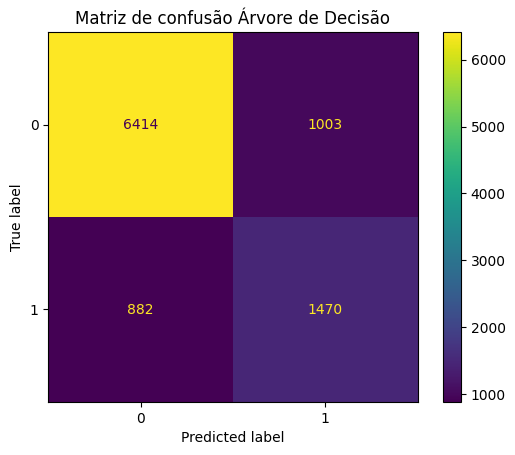

Random Forest=
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7417
           1       0.73      0.61      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



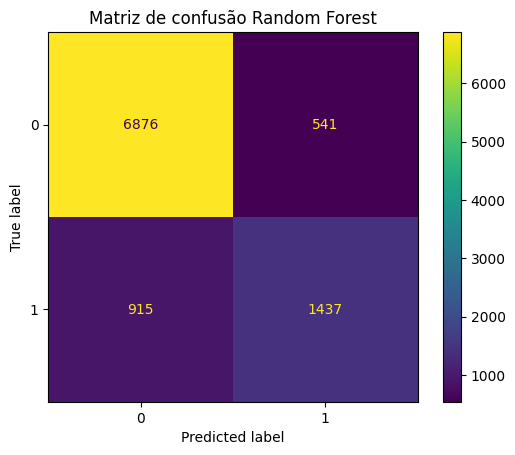

In [ ]:
avaliar_modelo(dt_model, x_test, y_test, "Árvore de Decisão")
avaliar_modelo(rf_model, x_test, y_test, "Random Forest")

Faremos uma análise destes resultados ao final, antes disso veremos a importancia dos atributos, definindo a seguinte função:

In [ ]:
import seaborn as sns

def plot_importancia_atributos(model, model_name):
    importancias = model.feature_importances_
    indices = np.argsort(importancias)[::-1]
    features = x.columns

    plt.figure(figsize=(10, 6))
    plt.title(f"Importância dos Atributos - {model_name}")
    sns.barplot(x=importancias[indices], y=features[indices])
    plt.tight_layout()
    plt.show()


Vamos chamar a função, e ver o resultados:

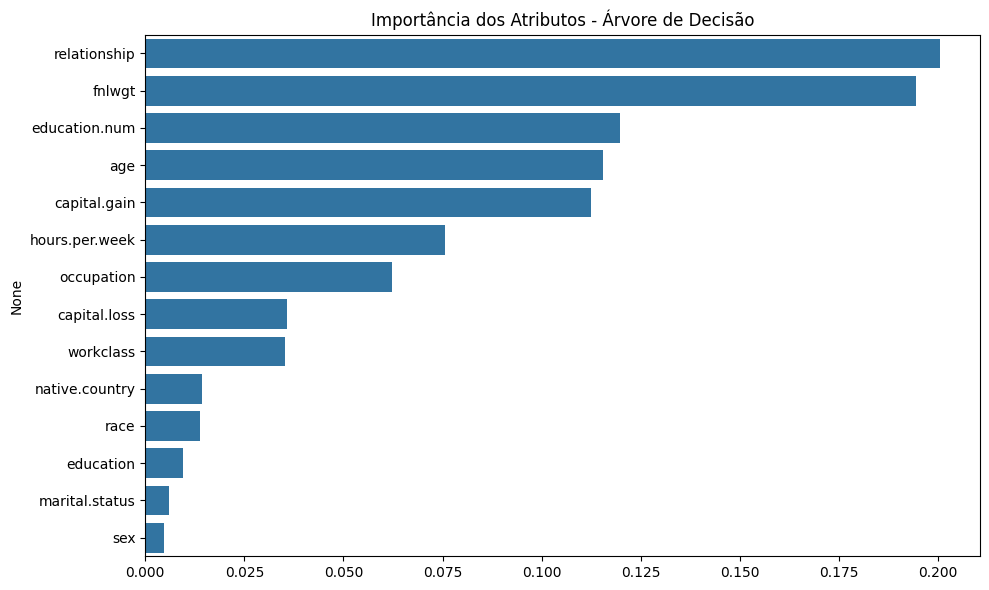

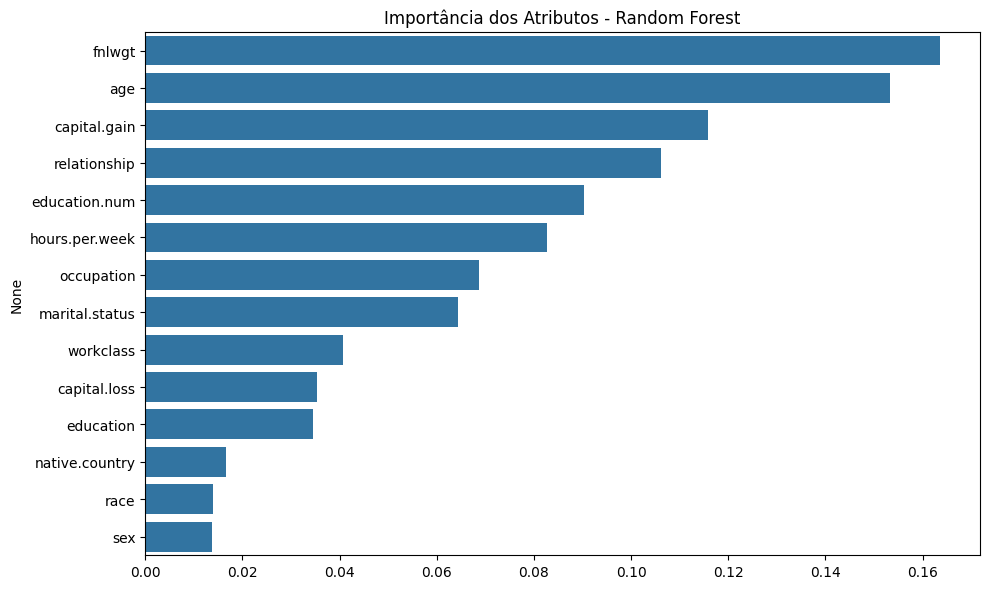

In [ ]:
plot_importancia_atributos(dt_model, "Árvore de Decisão")
plot_importancia_atributos(rf_model, "Random Forest")

# Análise

Acurácia:
Ávore de decisão = 81%
Random Forest = 85%

Neste aspecto a random Forest teve melhor acurácia, basicamente indicando uma melhor capacidade de classificação.

Precisão(Classe 1)
Árvore de decisão = 0.59
Random Forest = 0.73

A Random Foreste teve um aumento expressivo na precisão para a renda alta.



Recall, lembrando que mede a capacidade de encontrar todas as ocorrências reais da classe positiva(renda>50K, classe 1)

Árvore de Decisão = 0.62
Random Forest = 0.61

Praticamente igual, isto mostra que ambos os modelos tem desempenho parecido para dectar todas as pessoas com renda superior a 50K.

F1-Score (Média harmonica entre precisão e recall)
Para a classe 1:
Árvore de Decisão = 0.61
Random Forest = 0.66

Random Forest apresenta um maior equlibrio entre a precisão e o recall.

A Random Forest superou a Árvore de Decisão em praticamente todos os aspectos, principalmente na precisão e F1-score da classe 1, que é a mais difícil de classificar corretamente (pessoas com renda >50K).

Embora o recall para a classe 1 ainda seja moderado (aproximadamente 0.61) em ambos os casos, a Random Forest é claramente mais robusta e confiável.


Matriz de confusão:


Árvore de decisão:
Verdadeiros positivos= 6415, previu mais que 50K corretamente
Verdadeiros negativos= 1003, previu menos que 50k corretamente
Falsos postivos= 882, previu mais que 50k só que era menos que 50k
Falsos negativos= 1470, previu menos que 50k só que era mais que 50k

Random Forest:
Verdadeiros positivos= 6876, previu mais que 50K corretamente
Verdadeiros negativos= 541, previu menos que 50k corretamente
Falsos postivos= 915, previu mais que 50k só que era menos que 50k
Falsos negativos= 1437, previu menos que 50k só que era mais que 50k

Ao comparar as matrizes de confusão dos dois modelos, observamos que a **Random Forest** apresentou melhor desempenho em termos de **verdadeiros positivos** (6876 x 6415), ou seja, foi mais eficaz em identificar corretamente os indivíduos com renda superior a 50K. No entanto, ela teve **menos verdadeiros negativos** (541 x 1003), indicando que classificou incorretamente mais pessoas como tendo renda maior que50K quando na verdade ganhavam menos que 50K, aumentando assim seus **falsos positivos** (915 x. 882). Além disso, ambos os modelos tiveram um número semelhante de **falsos negativos** (1437 na Random Forest e 1470 na Árvore de Decisão), mostrando dificuldades equivalentes em detectar todos os casos de alta renda. Em resumo, a Random Forest demonstrou maior sensibilidade (melhor em capturar quem realmente ganha mais que50K), mas com um leve custo de precisão, enquanto a Árvore de Decisão foi um pouco mais conservadora, errando menos ao prever mais que 50K, mas também acertando menos.


Importância de atributos

O gráfico mostra quais características mais influenciam o modelo de Árvore de Decisão na hora de prever se uma pessoa ganha mais ou menos de 50 mil dólares por ano. A mais importante foi a relação familiar da pessoa (por exemplo, se é chefe da família, cônjuge, filho etc.). Em seguida, vem o fnlwgt, que é um número usado pelo censo para dar peso a cada pessoa na amostra — embora não seja uma característica pessoal, ele parece estar ligado a outras informações importantes. A escolaridade em números e a idade também tiveram bastante influência, mostrando que pessoas com mais estudo e mais velhas tendem a ganhar mais. Já características como sexo, estado civil e o nome da educação em texto tiveram pouca influência nas decisões do modelo.


# Conclusão

Comparando os dois modelos, a Random Forest teve desempenho melhor que a Árvore de Decisão, acertando mais vezes quem realmente ganha acima de 50 mil dólares. Apesar de cometer um pouco mais de erros ao prever quem ganha menos, foi mais equilibrada e eficiente no geral. A árvore simples teve bons resultados, mas foi menos precisa nas previsões da classe mais difícil. Por isso, a Random Forest é a opção mais confiável para este problema.